In [1]:
from os import chdir; chdir('../')
from lib.helpers.plot_helper import bar_plot

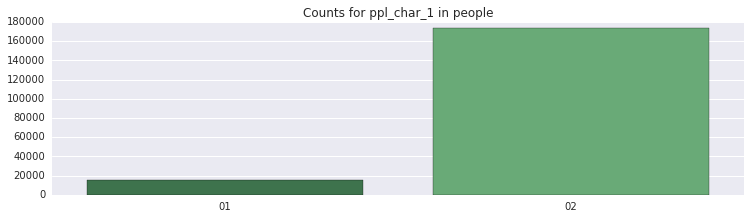

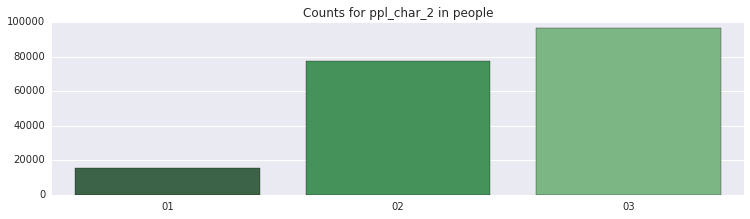

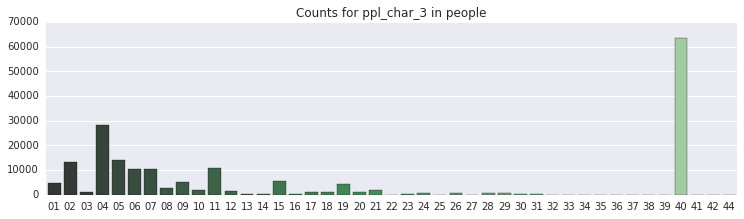

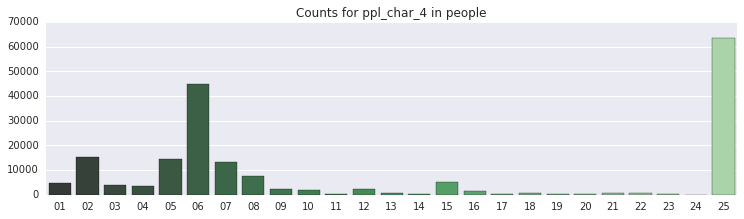

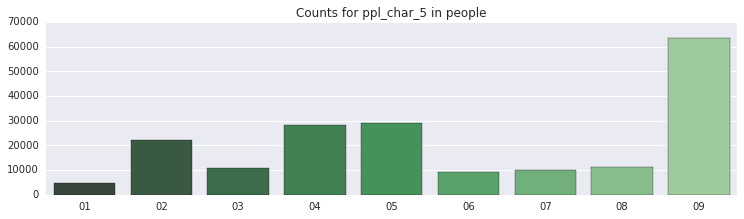

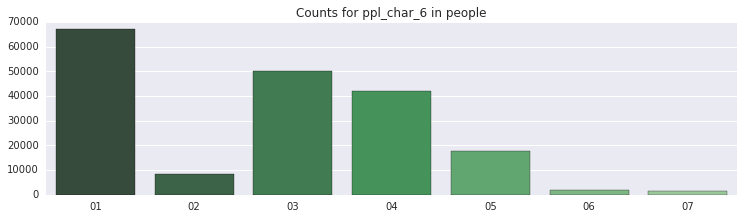

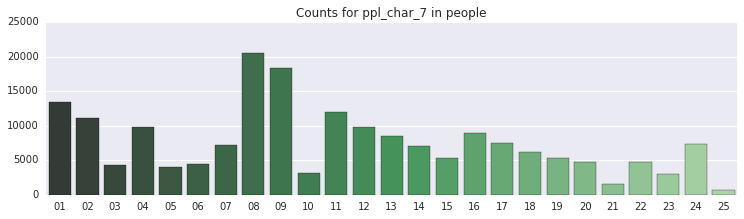

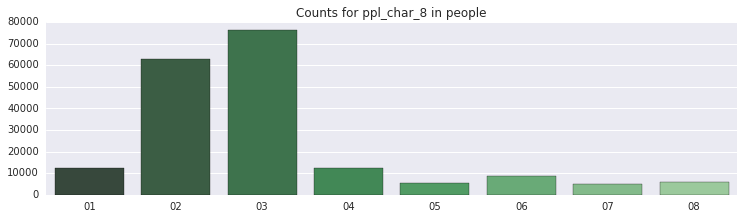

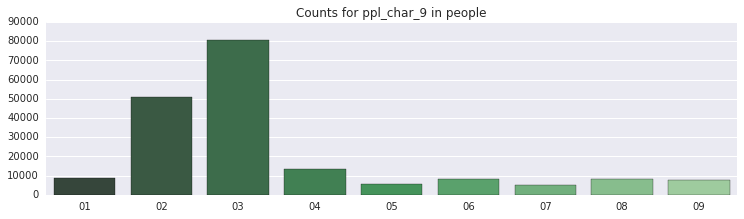

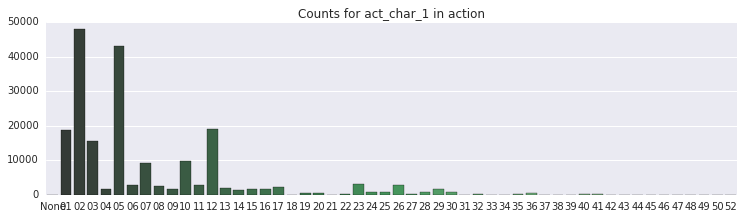

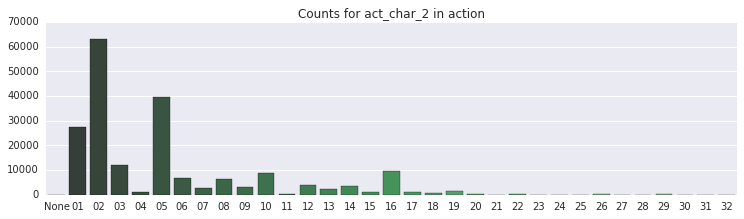

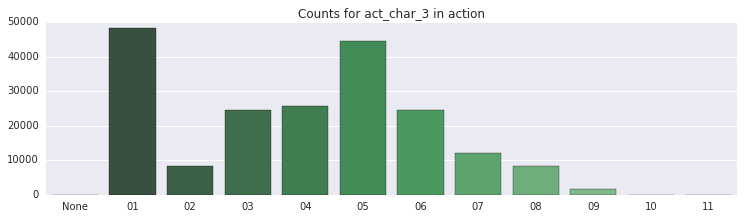

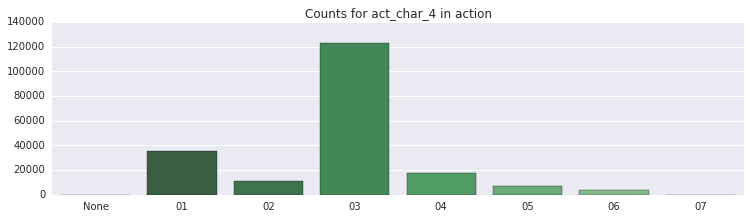

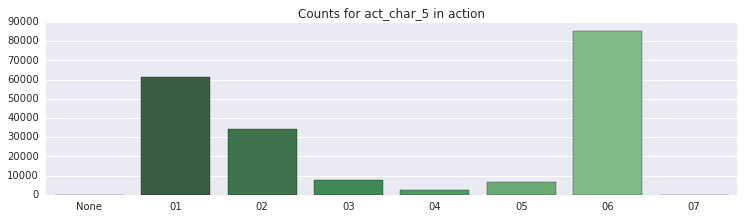

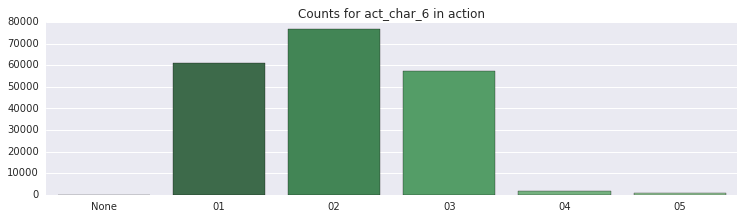

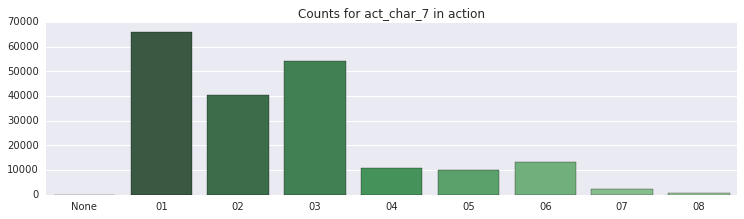

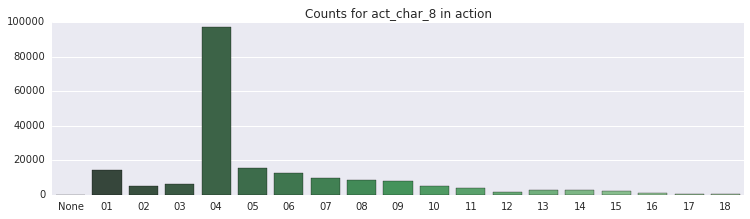

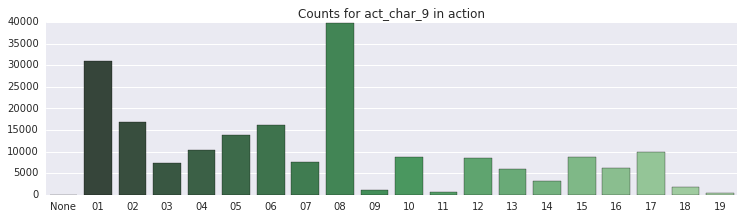

In [2]:
bar_plot('ppl_char_1','people')
bar_plot('ppl_char_2','people')
bar_plot('ppl_char_3','people')
bar_plot('ppl_char_4','people')
bar_plot('ppl_char_5','people')
bar_plot('ppl_char_6','people')
bar_plot('ppl_char_7','people')
bar_plot('ppl_char_8','people')
bar_plot('ppl_char_9','people')
bar_plot('act_char_1','action')
bar_plot('act_char_2','action')
bar_plot('act_char_3','action')
bar_plot('act_char_4','action')
bar_plot('act_char_5','action')
bar_plot('act_char_6','action')
bar_plot('act_char_7','action')
bar_plot('act_char_8','action')
bar_plot('act_char_9','action')